In [60]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('modified.csv')

In [62]:
#Dropping all the df points that have NaN as vlaue for one of the feature
df.dropna(inplace=True)

In [63]:
df_tr = df

In [64]:
print(df)

       Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
5939      Cobar     17.9     35.2       0.0         12.0      12.3   
5940      Cobar     18.4     28.9       0.0         14.8      13.0   
5942      Cobar     19.4     37.6       0.0         10.8      10.6   
5943      Cobar     21.9     38.4       0.0         11.4      12.2   
5944      Cobar     24.2     41.0       0.0         11.2       8.4   
5945      Cobar     27.1     36.1       0.0         13.0       0.0   
5946      Cobar     23.3     34.0       0.0          9.8      12.6   
5947      Cobar     16.1     34.2       0.0         14.6      13.2   
5948      Cobar     19.0     35.5       0.0         12.0      12.3   
5949      Cobar     19.7     35.5       0.0         11.0      12.7   
5950      Cobar     20.9     37.8       0.0         12.8      13.2   
5951      Cobar     23.9     39.1       0.0         13.8      12.1   
5952      Cobar     24.9     41.2       0.0         14.8      13.0   
5953      Cobar     

In [65]:
#Encoding Values for the columns with df as Strings
df["Location"]=df["Location"].astype('category')
df["Location"]=df["Location"].cat.codes

df["WindGustDir"]=df["WindGustDir"].astype('category')
df["WindGustDir"]=df["WindGustDir"].cat.codes

df["WindDir9am"]=df["WindDir9am"].astype('category')
df["WindDir9am"]=df["WindDir9am"].cat.codes

df["WindDir3pm"]=df["WindDir3pm"].astype('category')
df["WindDir3pm"]=df["WindDir3pm"].cat.codes

df["RainToday"]=df["RainToday"].astype('category')
df["RainToday"]=df["RainToday"].cat.codes

df["RainTomorrow"]=df["RainTomorrow"].astype('category')
df["RainTomorrow"]=df["RainTomorrow"].cat.codes

In [66]:
print(df)

        Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
5939           4     17.9     35.2       0.0         12.0      12.3   
5940           4     18.4     28.9       0.0         14.8      13.0   
5942           4     19.4     37.6       0.0         10.8      10.6   
5943           4     21.9     38.4       0.0         11.4      12.2   
5944           4     24.2     41.0       0.0         11.2       8.4   
5945           4     27.1     36.1       0.0         13.0       0.0   
5946           4     23.3     34.0       0.0          9.8      12.6   
5947           4     16.1     34.2       0.0         14.6      13.2   
5948           4     19.0     35.5       0.0         12.0      12.3   
5949           4     19.7     35.5       0.0         11.0      12.7   
5950           4     20.9     37.8       0.0         12.8      13.2   
5951           4     23.9     39.1       0.0         13.8      12.1   
5952           4     24.9     41.2       0.0         14.8      13.0   
5953  

In [67]:
#pass

In [68]:
clmns=['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']

In [69]:
df_std = stats.zscore(df[clmns])

In [70]:
#Cluster the data
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
labels = kmeans.labels_

In [71]:
df['clusters'] = labels

In [72]:
clmns.extend(['clusters'])

In [73]:
print(df[clmns].groupby(['clusters']).mean())

           Location    MinTemp    MaxTemp  Rainfall  Evaporation   Sunshine  \
clusters                                                                      
0         12.300276  14.062924  28.113333  0.377897     7.628903  10.078616   
1         12.840931  13.078648  21.705463  3.261674     4.130907   6.223175   

          WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm      ...       \
clusters                                                          ...        
0            7.082727      43.625265    6.041115    7.469299      ...        
1            7.745560      39.103538    7.821273    7.642284      ...        

          Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
clusters                                                                 
0           49.416527    31.021777  1016.561383  1013.528744  2.765734   
1           76.497856    61.595911  1017.677248  1015.613349  5.194476   

          Cloud3pm    Temp9am    Temp3pm  RainToday  RainTomorrow  
clust

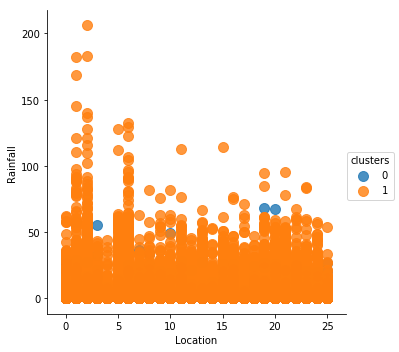

In [74]:
#Scatter plot of location vs RainTomorrow
sns.lmplot('Location', 'Rainfall', 
           data=df, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})

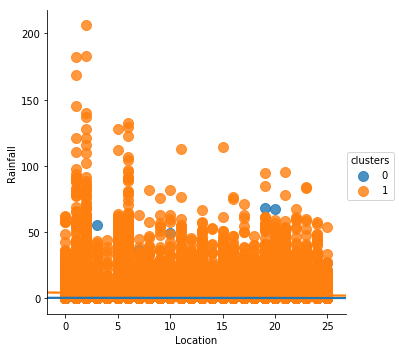

In [76]:
#Scatter plot of location vs RainTomorrow
sns.lmplot('Location', 'Rainfall', 
           data=df, 
           fit_reg=True, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})

In [ ]:
from pandas import plotting.parallel_coordinates
pd.tools.plotting.parallel_coordinates(df, 'clusters')